In [1]:
#LINEAR REGRESSION

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/PRIYANSHU SHARMA/Desktop/PRIYANSHU/6 STUDY/6 SEMSTER/MACHINE LEARNING/LAB/breast.csv')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
colnames=['ID', 'RADIUS', 'TEXTURE', 'PERIMETER', 'AREA', 'SMOOTHNESS', 'COMPACTNESS', 'CONCAVITY', 'CONCAVE', 'SYMMETRY', 'FRACTAL']
data = pd.read_csv('C:/Users/PRIYANSHU SHARMA/Desktop/PRIYANSHU/6 STUDY/6 SEMSTER/MACHINE LEARNING/LAB/breast.csv', names=colnames, header=None)
data.head()

,ID,RADIUS,TEXTURE,PERIMETER,AREA,SMOOTHNESS,COMPACTNESS,CONCAVITY,CONCAVE,SYMMETRY,FRACTAL
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


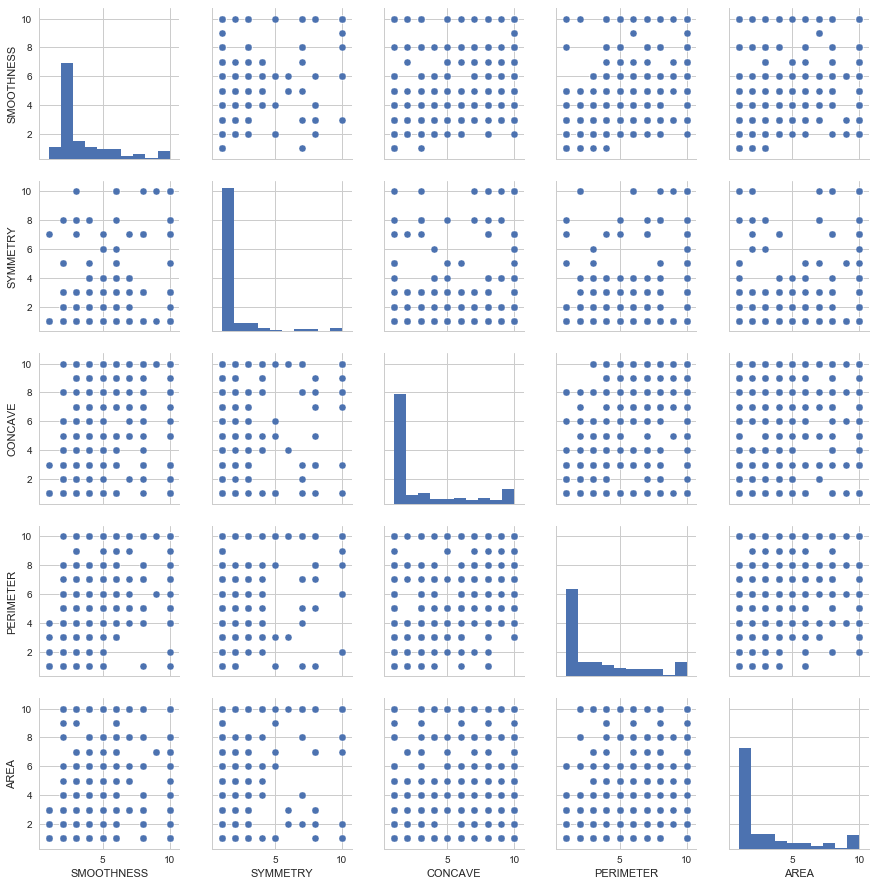

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style='whitegrid', context='notebook')
cols = ['SMOOTHNESS', 'SYMMETRY', 'CONCAVE', 'PERIMETER', 'AREA']
sb.pairplot(data[cols], size=2.5);
plt.show()

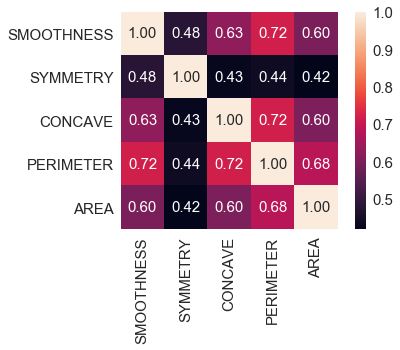

In [5]:
import numpy as np
cm = np.corrcoef(data[cols].values.T)
sb.set(font_scale=1.5)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [6]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [7]:
X = data[['CONCAVE']].values
Y = data[['AREA']].values

In [10]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

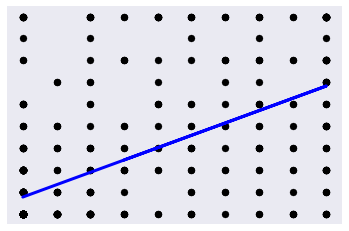

In [11]:
plt.scatter(X, Y,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [12]:
regr.coef_ #slope

array([[ 0.56418026]])

In [13]:
regr.intercept_ #intercept

array([ 1.18938879])

In [15]:
print('Slope: %.3f' % regr.coef_[0])
print('Intercept: %.3f' % regr.intercept_[0])

Slope: 0.564
Intercept: 1.189


In [16]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return self.net_input(X)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

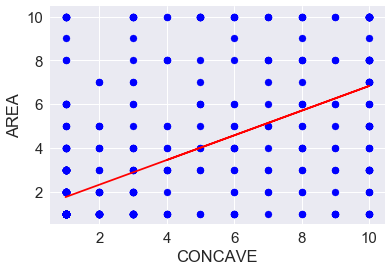

In [23]:
lin_regplot(X, Y, regr)
plt.xlabel('CONCAVE')
plt.ylabel('AREA')
plt.show()

In [22]:
data['CONCAVE'].unique()

array([ 1,  2,  7,  4,  5,  3, 10,  6,  9,  8], dtype=int64)

In [20]:
data['AREA'].unique()

array([ 1,  5,  3,  8, 10,  4,  6,  2,  9,  7], dtype=int64)

In [21]:
area_std = regr.predict(12)
print("AREA: %.3f" %area_std)

AREA: 7.960
